# <center> Pridicting Used Cars Price </center>

The Challenge is to determine the factors affecting used cars price.

Applied a correlation matrix to test for high feature collinearity, and full Exploratory Data Analysis. Used Linear Regression, Multiple Linear Regression, and Polinomial Regression for predictive modeling.

 **-**Using free data set (205 rows and 33 columns). 
 
 **-**Skill sets used: Python, Data Analysis, Data Wrangling, Data Visualization, Statistical Testing, Machine Learning


# Table of content
<p></p>
<li><a href="#ref1">Step 1: Full Exploratory Data Analysis (EDA) And Statistical Analysis</a></li>
<li><a href="#ref2">Step 2: Model Development </a></li>
<li><a href="#ref3">Step 3: Models Evaluation </a></li>
<li><a href="#ref4"> Step 4: 
Decision Making: Determining a Good Model Fit
</a></li>
<li><a href="#ref5">Conclusion</a></li>
<p></p>

<a id="ref1"></a>
# Step 1: Exploratory Data Analysis (EDA)

### Welcome!
In this section, we will explore several methods to see if certain characteristics or features can be used to predict price. 

### What are the main characteristics which have the most impact on the car price?

## 1. Import Data 

#### Setup

 Import libraries 

In [1]:
import pandas as pd
import numpy as np

 load data and store in dataframe df:

In [2]:
path='C:/Users/tasabeeh/Downloads/DA Labs/clean_df.csv'
df = pd.read_csv(path, index_col=1)
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,city-mpg,highway-mpg,price,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo,aspiration-std.1,aspiration-turbo.1
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,21,27,13495.0,Medium,0,1,1,0,1,0
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,21,27,16500.0,Medium,0,1,1,0,1,0
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,19,26,16500.0,Medium,0,1,1,0,1,0
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,24,30,13950.0,Low,0,1,1,0,1,0
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,18,22,17450.0,Medium,0,1,1,0,1,0


## 2. Analyzing Individual Feature Patterns using Visualization

 Import visualization packages "Matplotlib" and "Seaborn"

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [4]:
df[['bore','stroke','compression-ratio','horsepower','gas','price']].corr()


,bore,stroke,compression-ratio,horsepower,gas,price
bore,1.000000,-0.055390,0.001263,0.566936,-0.054458,0.543155
stroke,-0.055390,1.000000,0.187871,0.098267,-0.241064,0.082269
compression-ratio,0.001263,0.187871,1.000000,-0.214514,-0.985231,0.071107
horsepower,0.566936,0.098267,-0.214514,1.000000,0.169053,0.809575
gas,-0.054458,-0.241064,-0.985231,0.169053,1.000000,-0.110326
price,0.543155,0.082269,0.071107,0.809575,-0.110326,1.000000


## Continuous numerical variables: 


#### Positive linear relationship

Let's find the scatterplot of "engine-size" and "price" 

(0, 56217.15159361126)

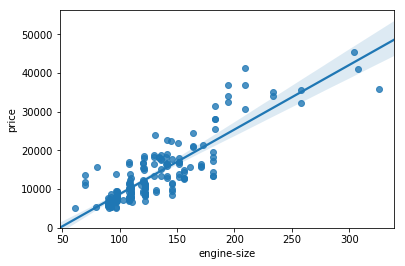

In [5]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line. E

 We can examine the correlation between 'engine-size' and 'price' and see it's approximately  0.87

In [6]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


### Negative linear relationship

Highway mpg is a potential predictor variable of price 

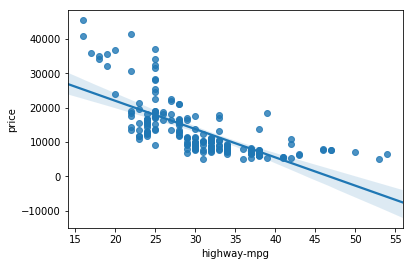

In [7]:
sns.regplot(x="highway-mpg", y="price", data=df)

As the highway-mpg goes up, the price goes down: this indicates an inverse/ negative relationship between these two variables. Highway mpg could potentially be a predictor of price.


We can examine the correlation between 'highway-mpg' and 'price' and see it's approximately  -0.704

In [8]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


### Weak Linear Relationship

Let's see if "Peak-rpm" as a predictor variable of "price".

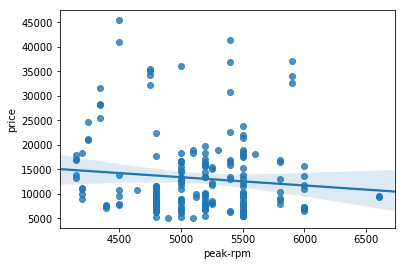

In [9]:
sns.regplot(x="peak-rpm", y="price", data=df)

Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable.


 we can examine the correlation between 'peak-rpm'  and 'price'and see it's approximately  -0.101616 

In [10]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


In [11]:
df[['stroke','price']].corr()

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


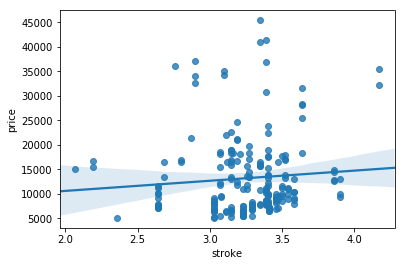

In [12]:
sns.regplot(x='stroke', y='price', data=df)

Stroke does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable.


## Categorical variables



Let's look at the relationship between "body-style" and "price".

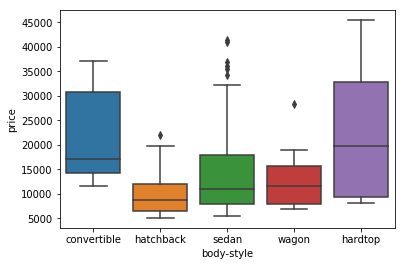

In [13]:
sns.boxplot(x="body-style", y="price", data=df)

We see that the distributions of price between the different body-style categories have a significant overlap, and so body-style would not be a good predictor of price. Let's examine engine "engine-location" and "price" :

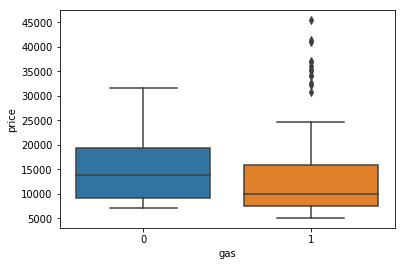

In [14]:
sns.boxplot(x="gas", y="price", data=df)

Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price. 

 Let's examine "drive-wheels" and "price".

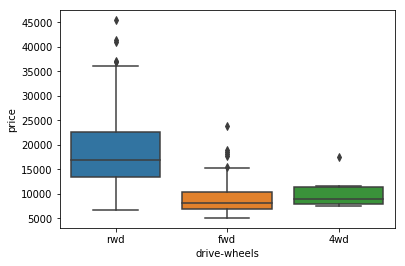

In [15]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

Here we see that the distribution of price between the different drive-wheels categories differs; as such drive-wheels could potentially be a predictor of price.

## 3. Descriptive Statistical Analysis

Let's first take a look at the variables by utilising a description method.

This will show:
- the count of that variable
- the mean
- the standard deviation (std) 
- the minimum value
- the IQR (Interquartile Range: 25%, 50% and 75%)
- the maximum value



In [16]:
df.describe()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,...,peak-rpm,city-mpg,highway-mpg,price,diesel,gas,aspiration-std,aspiration-turbo,aspiration-std.1,aspiration-turbo.1
count,201.000000,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,100.000000,0.840796,122.00000,98.797015,0.837102,0.911329,0.899108,2555.666667,126.875622,3.330692,...,5117.665368,25.179104,30.686567,13207.129353,0.099502,0.900498,0.820896,0.179104,0.820896,0.179104
std,58.167861,1.254802,31.99625,6.066366,0.059213,0.029066,0.040933,517.296727,41.546834,0.268072,...,478.113805,6.423220,6.815150,7947.066342,0.300083,0.300083,0.384397,0.384397,0.384397,0.384397
min,0.000000,-2.000000,65.00000,86.600000,0.678039,0.834025,0.799331,1488.000000,61.000000,2.540000,...,4150.000000,13.000000,16.000000,5118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,101.00000,94.500000,0.801538,0.886584,0.869565,2169.000000,98.000000,3.150000,...,4800.000000,19.000000,25.000000,7775.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,100.000000,1.000000,122.00000,97.000000,0.832292,0.905947,0.904682,2414.000000,120.000000,3.310000,...,5125.369458,24.000000,30.000000,10295.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,150.000000,2.000000,137.00000,102.400000,0.881788,0.921162,0.928094,2926.000000,141.000000,3.580000,...,5500.000000,30.000000,34.000000,16500.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,200.000000,3.000000,256.00000,120.900000,1.000000,0.995851,1.000000,4066.000000,326.000000,3.940000,...,6600.000000,49.000000,54.000000,45400.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object' as follows:

In [17]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,198
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,115,94,118,198,145,157,92,121


### Value Counts

In [18]:
df['drive-wheels'].value_counts()
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


repeat the above process for the variable 'engine-location'.

In [19]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


Examining the value counts of the engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, this result is skewed. Thus, we are not able to draw any conclusions about the engine location.

## 4. Basic of Grouping

calculating the average price for each of the different categories of data.

In [20]:
df_group_one=df[['drive-wheels','body-style','price']]

In [21]:
# grouping results

df_group_one=df_group_one.groupby(['drive-wheels'],as_index= False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.

In [22]:
# grouping results
df_gptest=df[['drive-wheels','body-style','price']]
grouped_test1=df_gptest.groupby(['drive-wheels','body-style'],as_index= False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [23]:
grouped_pivot=grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot=grouped_pivot.fillna(0) 
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [24]:
import matplotlib.pyplot as plt
% matplotlib inline 

#### Variables: Drive Wheels and Body Style vs Price

useing a heat map to visualize the relationship between Body Style vs Price 

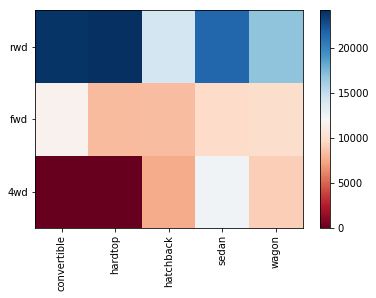

In [25]:
fig, ax=plt.subplots()
im=ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels=grouped_pivot.columns.levels[1]
col_labels=grouped_pivot.index
#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0])+0.5, minor=False)
#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)
#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()


 The main question we want to answer is "What are the main characteristics which have the most impact on the car price?". 

To get a better measure of the important characteristics, we look at the correlation of these variables with the car price, in other words: how is the car price dependent on this variable?

## 5. Correlation and Causation

 **Correlation**: a measure of the extent of interdependence between variables.


## Pearson Correlation

In [26]:
df.corr()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,...,peak-rpm,city-mpg,highway-mpg,price,diesel,gas,aspiration-std,aspiration-turbo,aspiration-std.1,aspiration-turbo.1
Unnamed: 0,1.000000,-0.162764,-0.241092,0.125517,0.161848,0.043976,0.252015,0.064820,-0.047764,0.244734,...,-0.195662,0.027956,0.020344,-0.118214,0.121454,-0.121454,-0.082739,0.082739,-0.082739,0.082739
symboling,-0.162764,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,...,0.279740,-0.035527,0.036233,-0.082391,-0.196735,0.196735,0.054615,-0.054615,0.054615,-0.054615
normalized-losses,-0.241092,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,...,0.239543,-0.225016,-0.181877,0.133999,-0.101546,0.101546,0.006911,-0.006911,0.006911,-0.006911
wheel-base,0.125517,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,...,-0.360305,-0.470606,-0.543304,0.584642,0.307237,-0.307237,-0.256889,0.256889,-0.256889,0.256889
length,0.161848,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,...,-0.285970,-0.665192,-0.698142,0.690628,0.211187,-0.211187,-0.230085,0.230085,-0.230085,0.230085
width,0.043976,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,...,-0.245800,-0.633531,-0.680635,0.751265,0.244356,-0.244356,-0.305732,0.305732,-0.305732,0.305732
height,0.252015,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,...,-0.309974,-0.049800,-0.104812,0.135486,0.281578,-0.281578,-0.090336,0.090336,-0.090336,0.090336
curb-weight,0.064820,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,...,-0.279361,-0.749543,-0.794889,0.834415,0.221046,-0.221046,-0.321955,0.321955,-0.321955,0.321955
engine-size,-0.047764,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,...,-0.256733,-0.650546,-0.679571,0.872335,0.070779,-0.070779,-0.110040,0.110040,-0.110040,0.110040
bore,0.244734,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,...,-0.267392,-0.582027,-0.591309,0.543155,0.054458,-0.054458,-0.227816,0.227816,-0.227816,0.227816


**P-value**: 
The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant. 

By convention, when the 
- p-value is < 0.001 we say there is strong evidence that the correlation is significant,
- the p-value is < 0.05; there is moderate evidence that the correlation is significant,
- the p-value is < 0.1; there is weak evidence that the correlation is significant, and
- the p-value is > 0.1; there is no evidence that the correlation is significant.

In [27]:
from scipy import stats

### Wheel-base vs Price

calculating the  Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'. 

In [28]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5846418222655081  with a P-value of P = 8.076488270732955e-20


##### Conclusion: 
Since the p-value is < 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585)

### Horsepower vs Price

 calculating the  Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'.

In [29]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8095745670036559  with a P-value of P = 6.36905742825998e-48


##### Conclusion:

Since the p-value is < 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1)

### Length vs Price

calculating the  Pearson Correlation Coefficient and P-value of 'length' and 'price'.

In [30]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.690628380448364  with a P-value of P = 8.016477466159053e-30


##### Conclusion:
Since the p-value is < 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).

### Width vs Price

 calculating the Pearson Correlation Coefficient and P-value of 'width' and 'price':

In [31]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522671  with a P-value of P = 9.200335510482363e-38


##### Conclusion:

Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

### Curb-weight vs Price

 calculating the Pearson Correlation Coefficient and P-value of 'curb-weight' and 'price':

In [32]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702846  with a P-value of P = 2.1895772388936997e-53


##### Conclusion:
Since the p-value is < 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).

### Engine-size vs Price

 calculating the Pearson Correlation Coefficient and P-value of 'engine-size' and 'price':

In [33]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622197996e-64


##### Conclusion:
Since the p-value is < 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).

### Bore vs Price

 calculating the  Pearson Correlation Coefficient and P-value of 'bore' and 'price':

In [34]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P = 8.049189483935364e-17


##### Conclusion:
Since the p-value is < 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).

 We can relate the process for each 'City-mpg'  and 'Highway-mpg':

### City-mpg vs Price

In [35]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844677  with a P-value of P = 2.3211320655676368e-29


##### Conclusion:
Since the p-value is < 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of ~ -0.687 shows that the relationship is negative and moderately strong.

### Highway-mpg vs Price

In [36]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is -0.7046922650589529  with a P-value of P = 1.7495471144476807e-31


##### Conclusion:
Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of ~ -0.705 shows that the relationship is negative and moderately strong.

## 6. ANOVA

### ANOVA: Analysis of Variance


### Drive Wheels

 Let's see if different types 'drive-wheels' impact  'price', we group the data.

In [37]:
grouped_test2=df_gptest[['drive-wheels','price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
140,4wd,7603.0


In [38]:
grouped_test2.get_group('4wd')['price']

4      17450.0
140     7603.0
144     9233.0
145    11259.0
148     8013.0
149    11694.0
154     7898.0
155     8778.0
Name: price, dtype: float64

In [39]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated? 

#### Separately: fwd and rwd

In [40]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


 Let's examine the other groups 

#### 4wd and rwd

In [41]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


#### 4wd and fwd

In [42]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


## Conclusion: Important Variables

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:
- Length
- Width
- Curb-weight
- Engine-size
- Horsepower
- City-mpg
- Highway-mpg
- Wheel-base
- Bore

Categorical variables:
- Drive-wheels

AS we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.

<a id="ref2"></a>
# Step 2: Model Development

In this section, we will develop several models that will predict the price of the car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.

Some questions we want to ask in this module
- How do I know if the dealer is offering fair value for my trade-in? 
- How do I know if I put a fair value on my car?


A Model will help us understand the exact relationship between different variables and how these variables are used to predict the result.

###  Linear Regression Multiple Linear Regression and Polynomial Regression 

###  i) Linear Regression

The result of Linear Regression is a **linear function** that predicts the response (dependent) variable as a function of the predictor (independent) variable. 

\begin{equation*}
 Y: Response \ Variable\\
 X :Predictor\ Variables
\end{equation*}


**Linear function:**
\begin{equation*}
Yhat = a + b  X
\end{equation*}


- a refers to the **intercept** of the regression, in other words: the value of Y when X is 0 
- b refers to the **slope** of the regression line, in other words: the value with which Y changes when X increases by 1.





In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lm = LinearRegression()
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:5]


array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

**price** = 38423.31 - 821.73 x  **highway-mpg**

####  Model Evaluation using Visualization

##### Regression Plot

 Let's visualize Horsepower as potential predictor variable of price:

(0, 48268.20282616955)

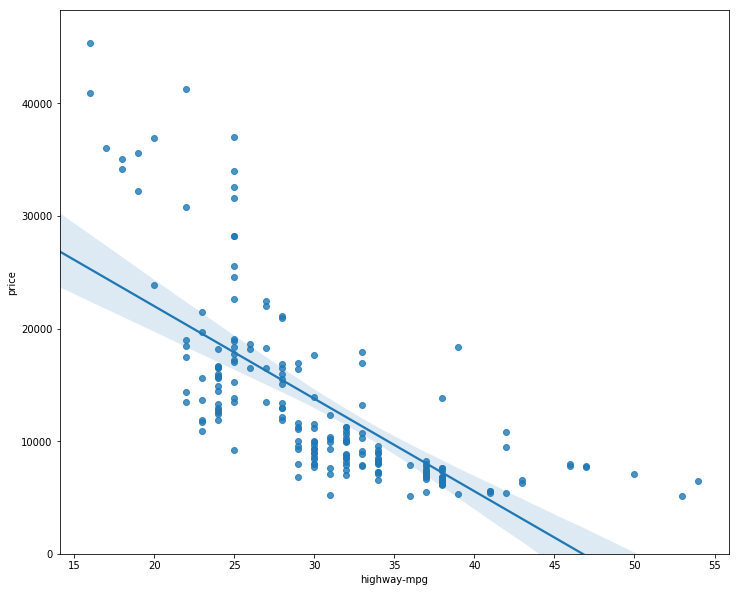

In [45]:
import seaborn as sns
%matplotlib inline 
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

We can see from this plot that price is negatively correlated to highway-mpg, since the regression slope is negative.
 Let's compare this plot to the regression plot of "peak-rpm".

(0, 47422.919330307624)

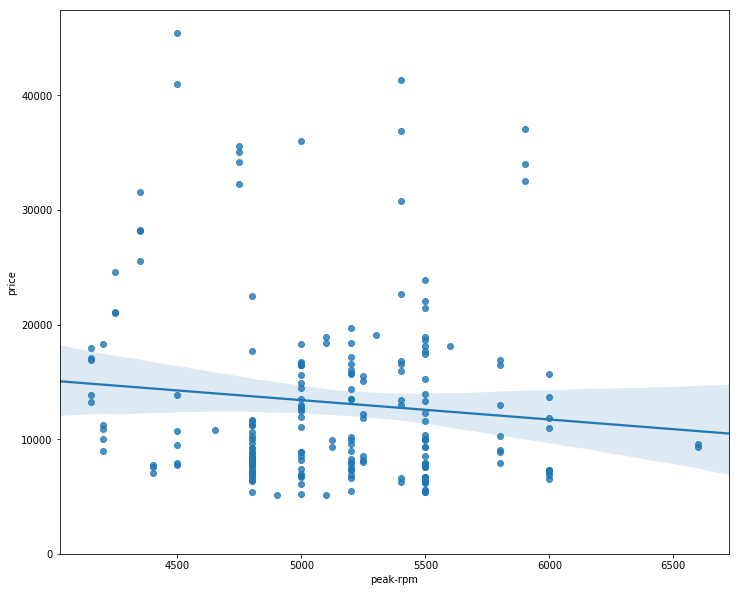

In [46]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Comparing the regression plot of "peak-rpm" and "highway-mpg" We see that the points for "highway-mpg" are much closer to the generated line and on the average decrease. The points for "peak-rpm"  have more spread around the predicted line, and it is much harder to determine if the points are decreasing or increasing as the  "highway-mpg"  increases.

##### Residual Plot

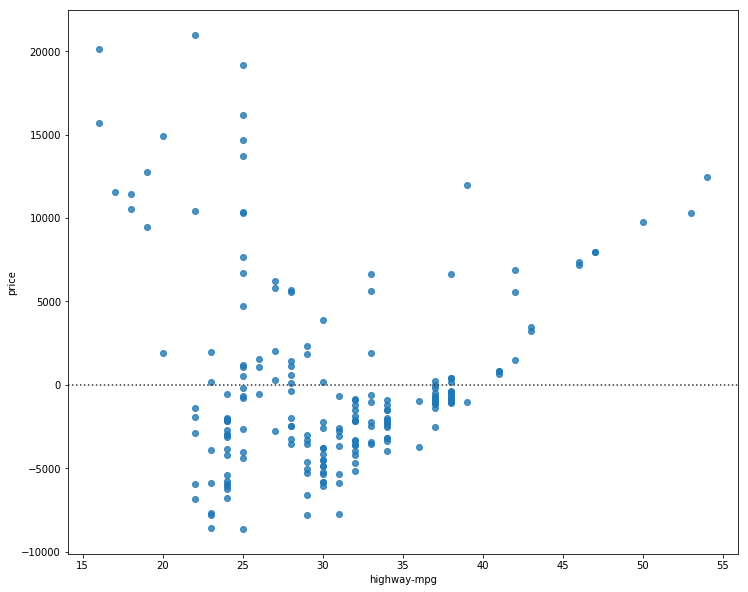

In [47]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.

###  ii) Multiple Linear Regression

 \begin{equation*}
Y: Response \ Variable\\
X_1 :Predictor\ Variable \ 1\\
X_2: Predictor\ Variable \ 2\\
X_3: Predictor\ Variable \ 3\\
X_4: Predictor\ Variable \ 4\\
\end{equation*}


 \begin{equation*}
a: intercept\\
b_1 :coefficients \ of\ Variable \ 1\\
b_2: coefficients \ of\ Variable \ 2\\
b_3: coefficients \ of\ Variable \ 3\\
b_4: coefficients \ of\ Variable \ 4\\
\end{equation*}


 The equation is given by:
  \begin{equation*}
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
\end{equation*}



From the previous section  we know that other good predictors of price could be: 
- Horsepower
- Curb-weight
- Engine-size
- Highway-mpg

In [48]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price'])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Price** = -15678.742628061467 + 52.65851272 x **horsepower** + 4.69878948 x **curb-weight** + 81.95906216 x **engine-size** + 33.58258185 x **highway-mpg**

####  Model Evaluation using Visualization

In [49]:
Y_hat = lm.predict(Z)

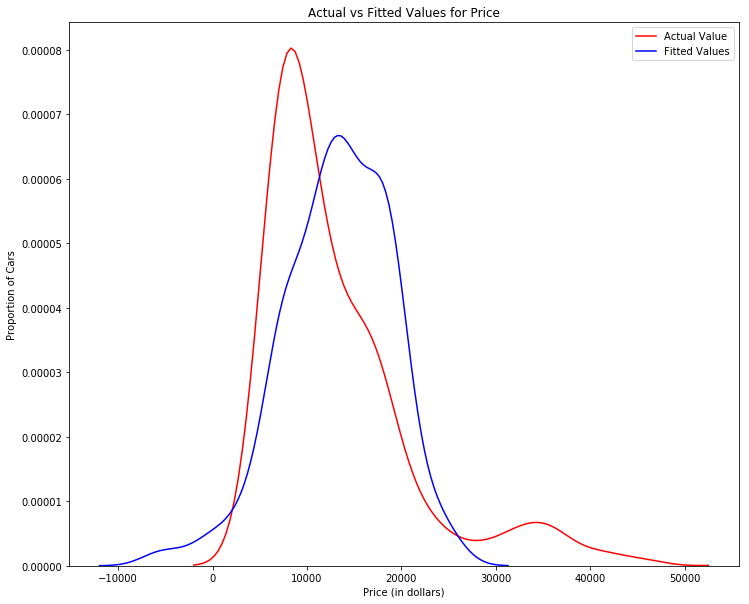

In [50]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

### iii)Polynomial Regression 

There are different orders of polynomial regression:
    <center>**Quadratic - 2nd order**</center>


 \begin{equation*}
Yhat = a + b_1 X^2 +b_2 X^2 
\\
\end{equation*}


 <center>**Cubic - 3rd order**</center>
 
 
 \begin{equation*}
Yhat = a + b_1 X^2 +b_2 X^2 +b_3 X^3\\
\end{equation*}

<center> **Higher order**:</center>


 \begin{equation*}
Y = a + b_1 X^2 +b_2 X^2 +b_3 X^3 ....\\
\end{equation*}

In [51]:
# Here we use a polynomial of the 3rd order (cubic) 
x = df['highway-mpg']
y = df['price']
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


####  Model Evaluation using Visualization

We saw earlier that a linear model did not provide the best fit while using highway-mpg as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

In [52]:
def PlotPolly(model,independent_variable,dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable,dependent_variabble,'.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_axis_bgcolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()
    

C:\Users\tasabeeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  


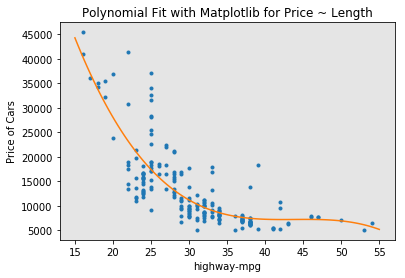

In [53]:
PlotPolly(p,x,y, 'highway-mpg')

We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.




 
 
 We can perform a polynomial transform on multiple features. First, we import the  module:
        
\begin{equation*}
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
\end{equation*}

In [54]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pr=PolynomialFeatures(degree=2)
Z_pr=pr.fit_transform(Z)
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(Z,y)
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

<a id="ref3"></a>
# Step 3: Models Evaluation

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

- **R^2 / R-squared**
- **Mean Squared Error (MSE)**

#### i) Model 1: Simple Linear Regression

 calculating the R^2

In [55]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
lm.score(X, Y)

0.4965911884339175

We can say that ~ 49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

calculating the MSE

In [56]:
Yhat=lm.predict(X)
Yhat[0:4]
from sklearn.metrics import mean_squared_error
#mean_squared_error(Y_true, Y_predict)
mean_squared_error(df['price'], Yhat)

31635042.944639895

#### Model 2: Multiple Linear Regression

calculating the R^2

In [57]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
lm.score(Z, df['price'])

0.8093562806577457

We can say that ~ 80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

calculating the MSE

In [58]:
Y_predict_multifit = lm.predict(Z)
mean_squared_error(df['price'], Y_predict_multifit)


11980366.87072649

#### Model 3: Polynomial Fit

calculating the R^2

In [59]:
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
r_squared

0.6741946663906517

We can say that ~ 67.419 % of the variation of price is explained by this polynomial fit

calculating the MSE 

In [60]:
mean_squared_error(df['price'], p(x))

20474146.42636122


<a id="ref4"></a>
# Step 4: 
### Decision Making: Determining a Good Model Fit



Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.

    R-squared: 0.49659118843391759
    MSE: 3.16 x10^7

Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.

    R-squared: 0.80896354913783497
    MSE: 1.2 x10^7

Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.

    R-squared: 0.6741946663906514
    MSE: 2.05 x 10^7


### i) Simple Linear Regression model (SLR) vs Multiple Linear Regression model (MLR)

- **MSE ** 
The MSE of SLR is  3.16x10^7  while MLR has an MSE of 1.2 x10^7.  The MSE of MLR is much smaller. 


- **R-squared**: 
In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809). 

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case, compared to SLR.

### ii) Simple Linear Model (SLR) vs Polynomial Fit

- **MSE**: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR. 

- **R-squared**: The R-squared for the Polyfit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.

Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting Price with Highway-mpg as a predictor variable.

### iii) Multiple Linear Regression (MLR) vs Polynomial Fit

- **MSE**: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
- **R-squared**: The R-squared for the MLR is also much larger than for the Polynomial Fit.

<a id="ref5"></a>
# Conclusion: 

Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price. 